In [173]:
import pandas as pd
import matplotlib.pyplot as plt

In [174]:
data = pd.read_csv('https://raw.githubusercontent.com/percepcioneseconomicas/indices/main/CEEN%20UDD%20IPECO.csv', parse_dates=True, dayfirst=True, index_col='Fecha')
data.columns = ['ipeco', 'coyuntura', 'expectativas', 'sea', 'da', 'sef', 'df', 'iif', 'ipecotm']
data

,ipeco,coyuntura,expectativas,sea,da,sef,df,iif,ipecotm
Fecha,,,,,,,,,
2001-12-01,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,NaN
2002-03-01,102.154837,98.573133,103.698719,102.302944,93.434467,100.318846,100.436180,109.139658,NaN
2002-06-01,108.159048,86.222434,116.394313,105.320513,48.783031,113.796170,128.505682,111.210817,103.437962
2002-09-01,101.676268,106.014345,100.337931,113.553114,93.149319,109.550052,80.432108,103.957999,103.996718
2002-12-01,100.376198,84.324335,106.452329,86.190918,82.683104,106.643645,113.492883,101.752065,103.403838
...,...,...,...,...,...,...,...,...,...
2020-10-01,76.311290,58.099439,83.116438,53.540587,69.128497,79.919551,102.831197,73.655349,74.163502
2020-11-01,79.008002,68.376084,83.062052,61.439366,84.625324,84.316935,94.527110,74.472780,75.509045
2020-12-01,66.987987,65.118686,67.825989,58.740526,80.119287,66.010929,82.430523,60.268885,74.102427


In [175]:
# Valores iniciales del Ipeco:
ipeco0 = 0.564465028
coyuntura0 = 0.375772273
expectativas0 = 0.688636166
sea0 = 0.503225806
da0 = 0.241887388
sef0 = 0.778145695
df0 = 0.502857143
iif0 = 0.78490566

# Multiplicar por el valor inicial
data['ipeco'] = data['ipeco']*ipeco0
data['coyuntura'] = data['coyuntura']*coyuntura0
data['expectativas'] = data['expectativas']*expectativas0
data['sea'] = data['sea']*sea0
data['da'] = data['da']*da0
data['sef'] = data['sef']*sef0
data['df'] = data['df']*df0
data['iif'] = data['iif']*iif0
data = data.drop('ipecotm', axis=1)

In [176]:
# Crear un dataframe vacío, con fechas mensuales desde el inicio del Ipeco
fecha = pd.date_range(start='2001-12-01', end='2021-02-01', freq='MS')
ipeco = pd.DataFrame(index=fecha)

# Fusionar las bases de datos
ipeco = ipeco.merge(data, how='left', left_index=True, right_index=True)

In [177]:
ipeco = ipeco.interpolate(method='linear', limit_area='inside')

In [178]:
consumo = pd.read_csv('https://raw.githubusercontent.com/percepcioneseconomicas/publicaciones/main/consumo_y_confianza/Consumo%20encadenado.csv', parse_dates=True, dayfirst=True, index_col='Fecha')
consumo['consumo-tc'] = consumo['consumo'].pct_change(12)
consumo

,consumo,consumo-tc
Fecha,,
1996-01-01,8759.662047,NaN
1996-04-01,9216.818404,NaN
1996-07-01,9072.717274,NaN
1996-10-01,9978.300897,NaN
1997-01-01,9181.422572,NaN
...,...,...
2019-10-01,25553.799060,0.031323
2020-01-01,24070.041510,0.038588
2020-04-01,19855.397880,-0.164514


In [179]:
fecha = pd.date_range(start='2001-12-01', end='2021-02-01', freq='QS')
trimestral = pd.DataFrame(index=fecha)
trimestral = trimestral.merge(consumo, how='left', left_index=True, right_index=True)

In [180]:
ipeco3 = ipeco.rolling(3).mean()
ipeco3 = ipeco3.shift(-2)

In [181]:
trimestral = trimestral.merge(ipeco3, how='left', left_index=True, right_index=True)
trimestral

,consumo,consumo-tc,ipeco,coyuntura,expectativas,sea,da,sef,df,iif
2002-01-01,10688.92731,0.093085,57.257390,37.219776,70.561664,51.095181,23.129992,77.979975,50.431938,83.273079
2002-04-01,11156.74224,0.102538,59.922278,33.947017,77.239118,52.493827,15.400206,85.054226,59.915017,86.748112
2002-07-01,11089.24538,0.090256,58.612465,37.358168,72.781996,55.761905,18.954430,86.347268,48.503907,83.494815
2002-10-01,11966.75031,0.059265,56.903468,34.403582,71.903392,47.963282,20.843882,83.738163,51.529091,80.442922
2003-01-01,11006.99484,0.072195,52.545726,36.314679,63.366424,44.722382,27.906977,71.389030,43.643873,75.066368
...,...,...,...,...,...,...,...,...,...,...
2020-01-01,24070.04151,0.038588,38.178373,35.376530,40.046269,42.660847,28.092214,44.619387,38.984093,36.535326
2020-04-01,19855.39788,-0.164514,30.845958,12.532567,43.054885,13.790864,11.274269,52.545338,32.730978,43.888338
2020-07-01,22775.54141,-0.032491,39.167728,16.807034,54.074858,18.157638,15.456430,67.021829,42.681764,52.520981
2020-10-01,26611.11494,0.035109,41.828228,23.998597,53.714649,29.140209,18.856985,59.722012,46.897937,54.523999


In [182]:
data = trimestral.copy()

Text(0.5, 1.0, 'Consumo (TC) y Confianza de los consumidores')

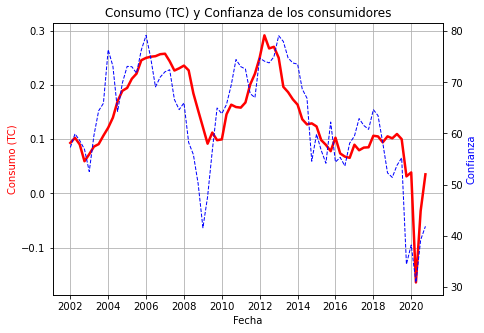

In [183]:
fig, ax1 = plt.subplots(figsize=(7,5))
ax1.plot(data['consumo-tc'], color='red', linewidth=2.5)
ax1.set_xlabel('Fecha')
ax1.set_ylabel('Consumo (TC)', color='red')
plt.grid()
ax2 = ax1.twinx()
ax2.plot(data['ipeco'], color='blue', linewidth=1, linestyle='--')
ax2.set_ylabel('Confianza', color='blue')
plt.title('Consumo (TC) y Confianza de los consumidores')

In [184]:
data['consumo-tc'].corr(data['ipeco'])

0.7827340701357466

In [185]:
data['correlacion'] = data['consumo-tc'].rolling(24).corr(data['ipeco'])
data['correlacion'].describe()

count    53.000000
mean      0.669563
std       0.109208
min       0.446885
25%       0.572834
50%       0.664574
75%       0.758292
max       0.847294
Name: correlacion, dtype: float64

Text(0.5, 1.0, 'Consumo (TC) y Correlación con IPECO (24 trimestres)')

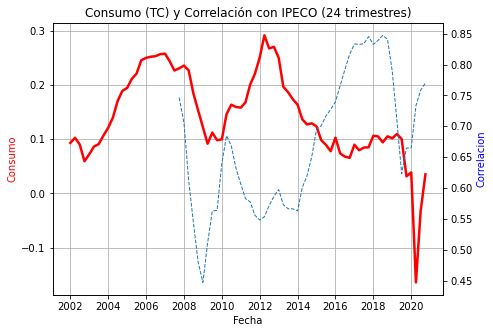

In [121]:
fig, ax1 = plt.subplots(figsize=(7,5))
ax1.plot(data['consumo-tc'], color='red', linewidth=2.5)
ax1.set_xlabel('Fecha')
ax1.set_ylabel('Consumo', color='red')
plt.grid()
ax2 = ax1.twinx()
ax2.plot(data[['correlacion']],  linewidth=1, linestyle='--')
ax2.set_ylabel('Correlacion', color='blue')
plt.title('Consumo (TC) y Correlación con IPECO (24 trimestres)')

In [122]:
data[['correlacion', 'consumo-tc', 'ipeco']].corr()

,correlacion,consumo-tc,ipeco
correlacion,1.000000,-0.498500,-0.267415
consumo-tc,-0.498500,1.000000,0.782734
ipeco,-0.267415,0.782734,1.000000


In [123]:
l01ipeco = data['ipeco'].shift(1)
l02ipeco = data['ipeco'].shift(2)
l03ipeco = data['ipeco'].shift(3)
l04ipeco = data['ipeco'].shift(4)
f01ipeco = data['ipeco'].shift(-1)
f02ipeco = data['ipeco'].shift(-2)
f03ipeco = data['ipeco'].shift(-3)
f04ipeco = data['ipeco'].shift(-4)
lfipeco = pd.concat([data['consumo-tc'], l04ipeco, l03ipeco, l02ipeco, l01ipeco, data['ipeco'], f01ipeco, f02ipeco, f03ipeco, f04ipeco], axis=1)
lfipeco.columns = ['consumo-tc', 'l04ipeco', 'l03ipeco', 'l02ipeco', 'l01ipeco', 'ipeco', 'f01ipeco', 'f02ipeco', 'f03ipeco', 'f04ipeco']
lfipeco = lfipeco.dropna()
lfipeco.head()

,consumo-tc,l04ipeco,l03ipeco,l02ipeco,l01ipeco,ipeco,f01ipeco,f02ipeco,f03ipeco,f04ipeco
2003-01-01,0.072195,57.257390,59.922278,58.612465,56.903468,52.545726,59.593418,64.428811,65.894201,76.376000
2003-04-01,0.086309,59.922278,58.612465,56.903468,52.545726,59.593418,64.428811,65.894201,76.376000,73.147356
2003-07-01,0.090817,58.612465,56.903468,52.545726,59.593418,64.428811,65.894201,76.376000,73.147356,64.299776
2003-10-01,0.106574,56.903468,52.545726,59.593418,64.428811,65.894201,76.376000,73.147356,64.299776,69.886150
2004-01-01,0.121133,52.545726,59.593418,64.428811,65.894201,76.376000,73.147356,64.299776,69.886150,73.123015


In [124]:
correlaciones = lfipeco.corr()
correlaciones = correlaciones.drop('consumo-tc')
correlaciones['consumo-tc']

l04ipeco    0.693828
l03ipeco    0.739235
l02ipeco    0.738212
l01ipeco    0.725804
ipeco       0.693555
f01ipeco    0.612354
f02ipeco    0.516784
f03ipeco    0.427732
f04ipeco    0.357753
Name: consumo-tc, dtype: float64

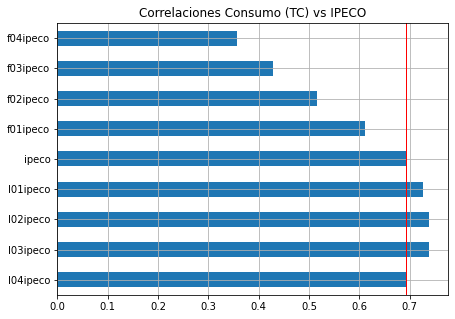

In [171]:
ax = correlaciones['consumo-tc'].plot.barh(title='Correlaciones Consumo (TC) vs IPECO', grid=True, figsize=(7,5))
ax.axvline(correlaciones['consumo-tc']['ipeco'], color='red', linewidth=1)

In [126]:
correlaciones['consumo-tc'].sort_values(ascending=False)

l03ipeco    0.739235
l02ipeco    0.738212
l01ipeco    0.725804
l04ipeco    0.693828
ipeco       0.693555
f01ipeco    0.612354
f02ipeco    0.516784
f03ipeco    0.427732
f04ipeco    0.357753
Name: consumo-tc, dtype: float64

In [132]:
data['general'] = data[['da', 'df']].mean(axis=1)
data['personal'] = data[['sea', 'sef', 'iif']].mean(axis=1)

In [146]:
mat_corr = data[['consumo-tc', 'ipeco', 'expectativas', 'coyuntura', 'general', 'personal']].corr()
mat_corr = mat_corr.drop('consumo-tc')
mat_corr = mat_corr['consumo-tc'].sort_values()
mat_corr

expectativas    0.629395
personal        0.731298
general         0.738024
ipeco           0.782734
coyuntura       0.831783
Name: consumo-tc, dtype: float64

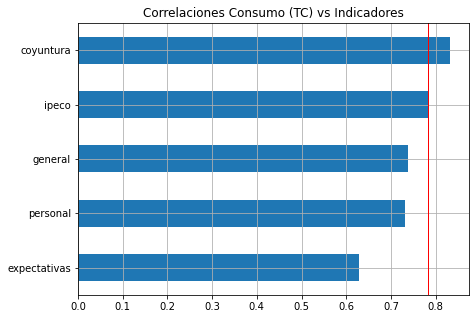

In [147]:
ax = mat_corr.plot.barh(title='Correlaciones Consumo (TC) vs Indicadores', grid=True, figsize=(7,5))
ax.axvline(mat_corr['ipeco'], color='red', linewidth=1)

In [151]:
indicadores = data[['consumo-tc', 'coyuntura', 'expectativas', 'general', 'personal']]
zindicadores = (indicadores - indicadores.mean()) / indicadores.std()

Text(0.5, 1.0, 'Consumo (TC) e I.Expectativas')

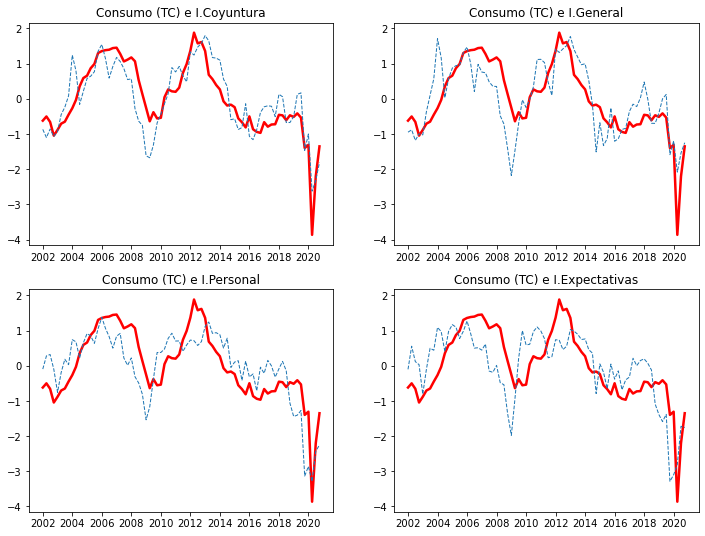

In [168]:
plt.figure(figsize=(12,9))

plt.subplot(2, 2, 1)
plt.plot(zindicadores['consumo-tc'], linewidth=2.5, color='red')
plt.plot(zindicadores['coyuntura'], linewidth=1, linestyle='--')
plt.title('Consumo (TC) e I.Coyuntura')

plt.subplot(2, 2, 2)
plt.plot(zindicadores['consumo-tc'], linewidth=2.5, color='red')
plt.plot(zindicadores['general'], linewidth=1, linestyle='--')
plt.title('Consumo (TC) e I.General')

plt.subplot(2, 2, 3)
plt.plot(zindicadores['consumo-tc'], linewidth=2.5, color='red')
plt.plot(zindicadores['personal'], linewidth=1, linestyle='--')
plt.title('Consumo (TC) e I.Personal')

plt.subplot(2, 2, 4)
plt.plot(zindicadores['consumo-tc'], linewidth=2.5, color='red')
plt.plot(zindicadores['expectativas'], linewidth=1, linestyle='--')
plt.title('Consumo (TC) e I.Expectativas')